# 0. Useful libraries

In [1]:
from imports import *
from src import *

# 1. Explore dataset

In [2]:
df = pd.read_csv(r'C:\Users\johnn\Chronic-kidney-disease---Binary-Classification\dataset\kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
# Calculate the proportion of missing values for each feature and sort them in descending order
null_values_df = pd.DataFrame({
    'missing_ratio': df.isnull().sum() / df.shape[0],
    'type': df.dtypes
})
null_values_df = null_values_df.sort_values(by='missing_ratio', ascending=False)

# Display the bar chart
null_values = px.bar(null_values_df,
                     x = null_values_df.index,
                     y = 'missing_ratio',
                     color = 'type')
null_values.update_layout(
    title = dict(text=f"The proportion of NaN value for each column", font=dict(size=20)),
    xaxis = dict(title=dict(text='Column name', font=dict(size=15)), tickfont=dict(size=15)),
    yaxis = dict(title=dict(text='Proportion', font=dict(size=15)), tickfont=dict(size=15), range=[0,1]),
    legend_title = dict(text='Type of column', font=dict(size=15))
)
null_values.show()

- Some columns have a significant proportion of missing values, so they must be imputed.

In [5]:
# Calculate the number of unique values for each feature and sort them in descending order
unique_values_df = pd.DataFrame({
    'unique_number': df.nunique(),
    'type': df.dtypes
})
unique_values_df = unique_values_df.sort_values(by='unique_number', ascending=False)

# Display the bar chart
unique_values = px.bar(unique_values_df,
                       x = unique_values_df.index,
                       y = 'unique_number',
                       color = 'type')
unique_values.update_layout(
    title = dict(text='The number of unique value for each column', font=dict(size=20)),
    xaxis = dict(title=dict(text='Column name', font=dict(size=15)), tickfont=dict(size=15)),
    yaxis = dict(title=dict(text='Number', font=dict(size=15)), tickfont=dict(size=15)),
    legend_title = dict(text='Type of column', font=dict(size=15))
)
unique_values.show()

- the 'id' column that only contains unique values is not informative, so it will be dropped
- the 'pcv', 'wc' and 'rc' categorical columns contain several unique values.

In [6]:
df[['pcv', 'wc', 'rc']].head()

,pcv,wc,rc
0,44,7800,5.2
1,38,6000,NaN
2,31,7500,NaN
3,32,6700,3.9
4,35,7300,4.6


It turns out that the 'pcv', 'wc' and 'rc' categorical columns were misclassified and thus need to be converted into numerical type.

In [7]:
misclassified_columns = ['pcv','wc', 'rc']
for column in misclassified_columns :
    df[column] = pd.to_numeric(df[column], errors='coerce')

## 1.1. Numerical features

(<Figure size 4000x5000 with 15 Axes>,
 array([<Axes: xlabel='age', ylabel='Probability density'>,
        <Axes: xlabel='bp', ylabel='Probability density'>,
        <Axes: xlabel='sg', ylabel='Probability density'>,
        <Axes: xlabel='al', ylabel='Probability density'>,
        <Axes: xlabel='su', ylabel='Probability density'>,
        <Axes: xlabel='bgr', ylabel='Probability density'>,
        <Axes: xlabel='bu', ylabel='Probability density'>,
        <Axes: xlabel='sc', ylabel='Probability density'>,
        <Axes: xlabel='sod', ylabel='Probability density'>,
        <Axes: xlabel='pot', ylabel='Probability density'>,
        <Axes: xlabel='hemo', ylabel='Probability density'>,
        <Axes: xlabel='pcv', ylabel='Probability density'>,
        <Axes: xlabel='wc', ylabel='Probability density'>,
        <Axes: xlabel='rc', ylabel='Probability density'>, <Axes: >],
       dtype=object))

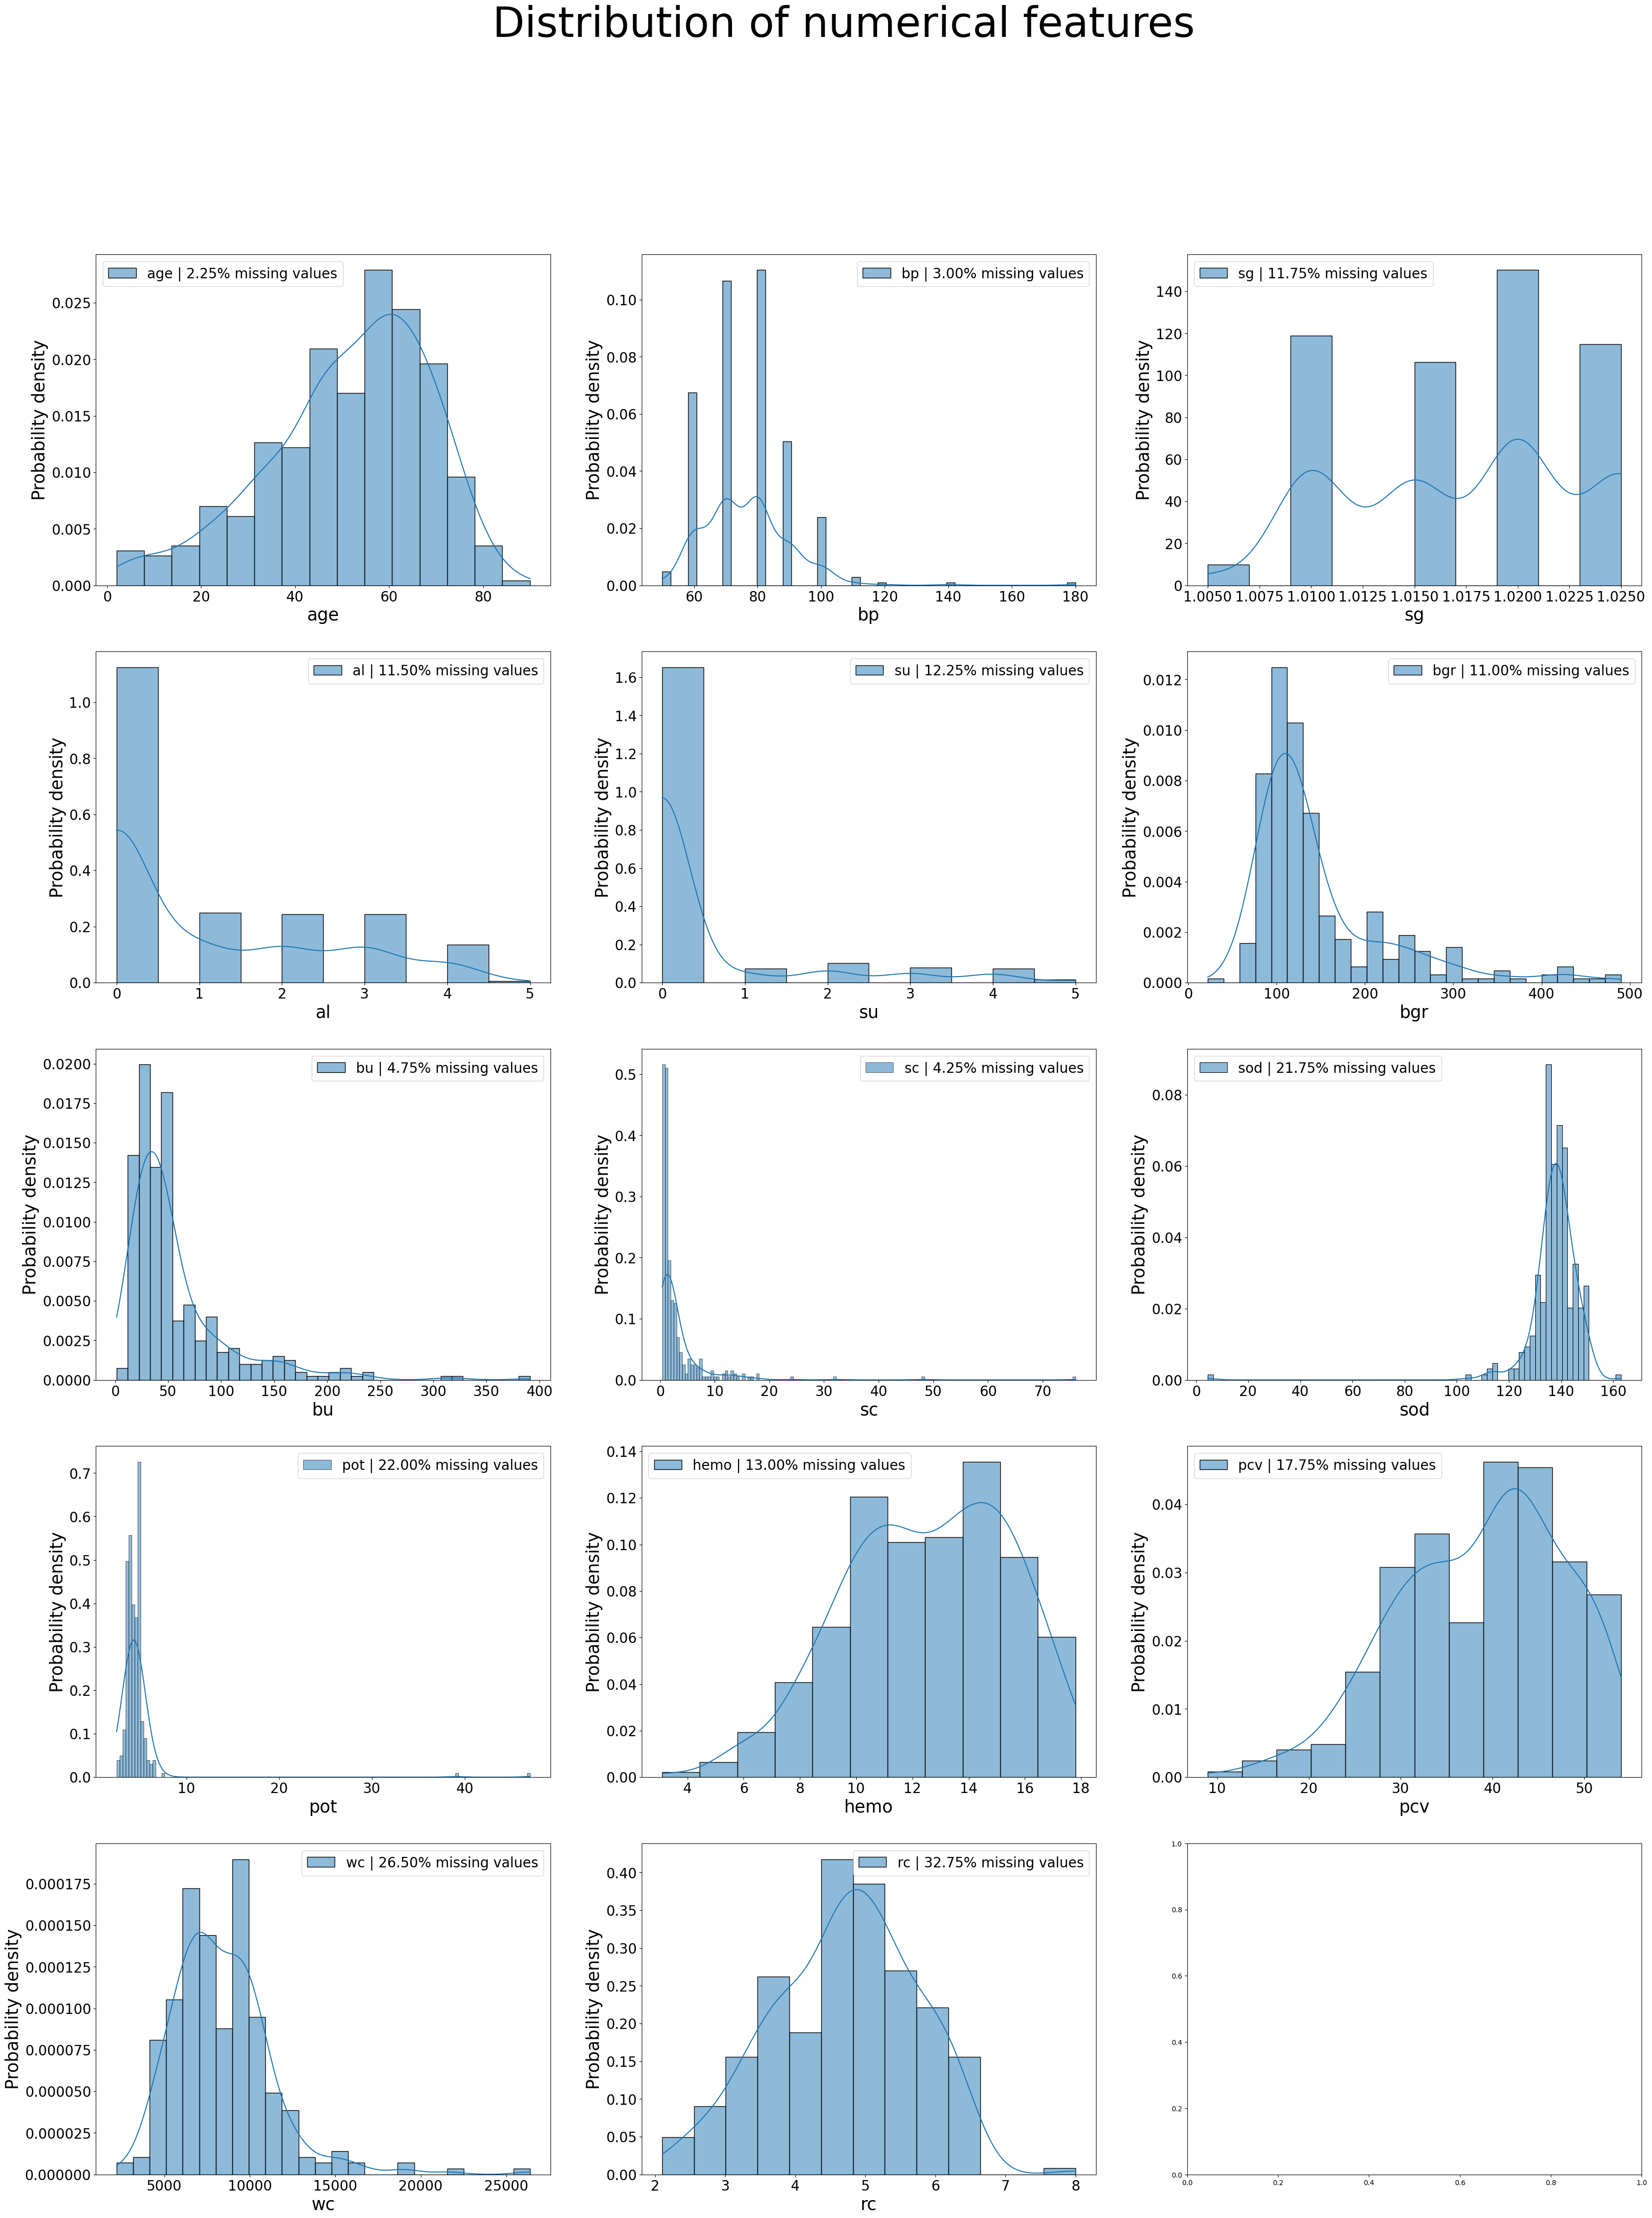

In [8]:
# PARAMETERS TO CHOOSE
numerical_features = df.select_dtypes(include='number').drop('id', axis=1).columns
n_rows = 5
n_cols = 3

numerical_distribution(df, numerical_features, n_rows, n_cols)

- Some numerical features show some extreme outliers.
- Some numerical features have highly skewed distributions, while others are nearly normally distributed.
- The missing values of numerical feature will be imputed using KNN.
- Numerical features are on different scales, so standardization will be required.


## 1.2. Categorical features

(<Figure size 4000x5000 with 12 Axes>,
 array([<Axes: xlabel='rbc', ylabel='Counting'>,
        <Axes: xlabel='pc', ylabel='Counting'>,
        <Axes: xlabel='pcc', ylabel='Counting'>,
        <Axes: xlabel='ba', ylabel='Counting'>,
        <Axes: xlabel='htn', ylabel='Counting'>,
        <Axes: xlabel='dm', ylabel='Counting'>,
        <Axes: xlabel='cad', ylabel='Counting'>,
        <Axes: xlabel='appet', ylabel='Counting'>,
        <Axes: xlabel='pe', ylabel='Counting'>,
        <Axes: xlabel='ane', ylabel='Counting'>,
        <Axes: xlabel='classification', ylabel='Counting'>, <Axes: >],
       dtype=object))

C:\Users\johnn\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning:

Glyph 9 (	) missing from current font.

C:\Users\johnn\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 9 (	) missing from current font.



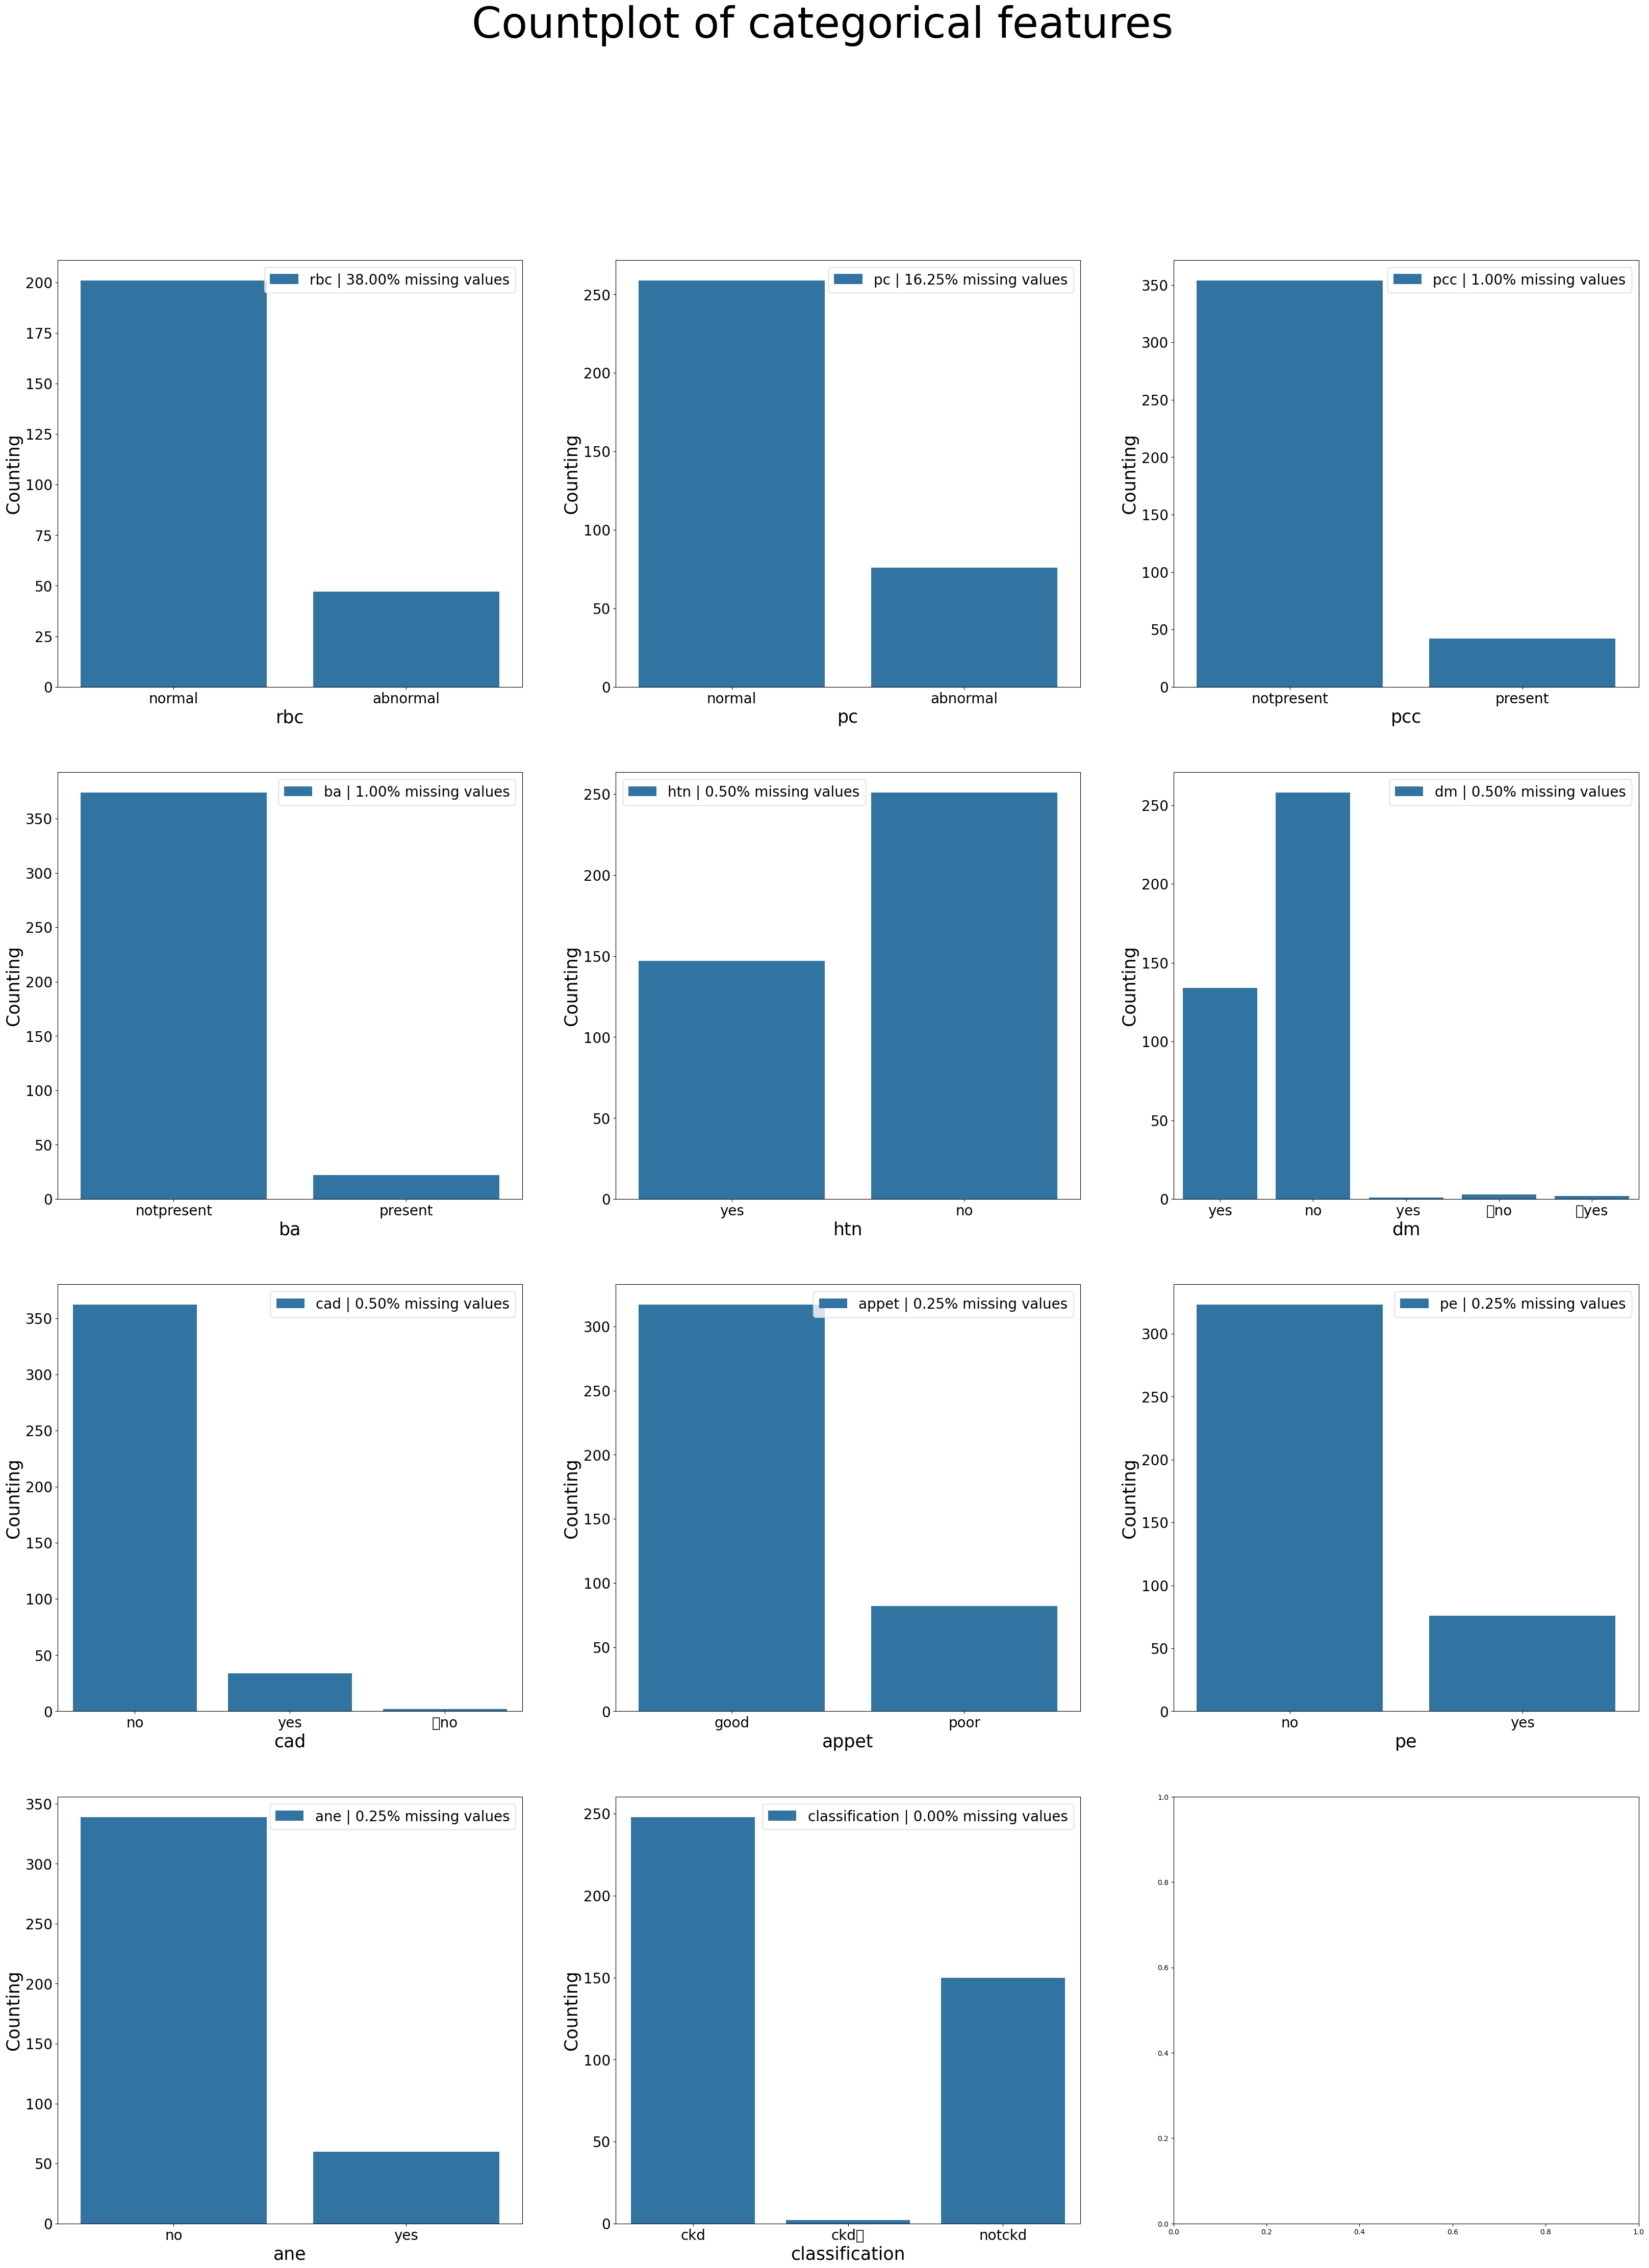

In [9]:
# PARAMETERS TO CHOOSE
categorical_features = df.select_dtypes('object').columns
n_rows = 4
n_cols = 3

categorical_countplot(df, categorical_features, n_rows, n_cols)

- Some categorical features need to be cleaned.
- All categorical features are binary, so a one-hot-encoding can be computed.
- The missing values of encoded categorical feature will be imputed using the most recurrent value.

# 2. Clean and Preprocess dataset

In [10]:
# Clean the dataset 
cleaned_df = cleaning(df)

# Retrieve the target and the features
y = cleaned_df['classification']
X = cleaned_df.drop('classification', axis=1)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [11]:
# Call the features preprocessor defined in preprocessing.py
preprocessing = FeaturesPreprocessing()
# Fit and transform the training features set
preprocessing.fit(X_train)
X_train_transformed = preprocessing.transform(X_train)
# Transform the test features set
X_test_transformed = preprocessing.transform(X_test)

In [ ]:
preprocessed_train_df = pd.concat([X_train_transformed, y_train], axis=1)
preprocessed_test_df = pd.concat([X_test_transformed, y_test], axis=1)
preprocessed_df = pd.concat([preprocessed_train_df, preprocessed_test_df], axis=0)

plot_comparison(cleaned_df, preprocessed_df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


MemoryError: Unable to allocate 2.13 EiB for an array with shape (307606055705424768,) and data type float64

- KNN imputation helps preserve the distribution of numerical features from the original dataset better than simple strategies, such as mean or median imputation.

# 3. Features vs. target

In [26]:
numerical_features = [col for col in preprocessed_df.columns if preprocessed_df[col].nunique() > 2]

n_cols = 3
n_rows = math.ceil(len(numerical_features) / n_cols)

figure = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=numerical_features)

for (i, feature) in enumerate(numerical_features):

    row_i, col_i = i // n_cols + 1, i%n_cols + 1

    fig_i = px.violin(preprocessed_df,
             x = 'classification',
             y = feature,
             color='classification')
    
    for trace in fig_i.data:
        figure.add_trace(trace, row=row_i, col=col_i)

figure.show()
    

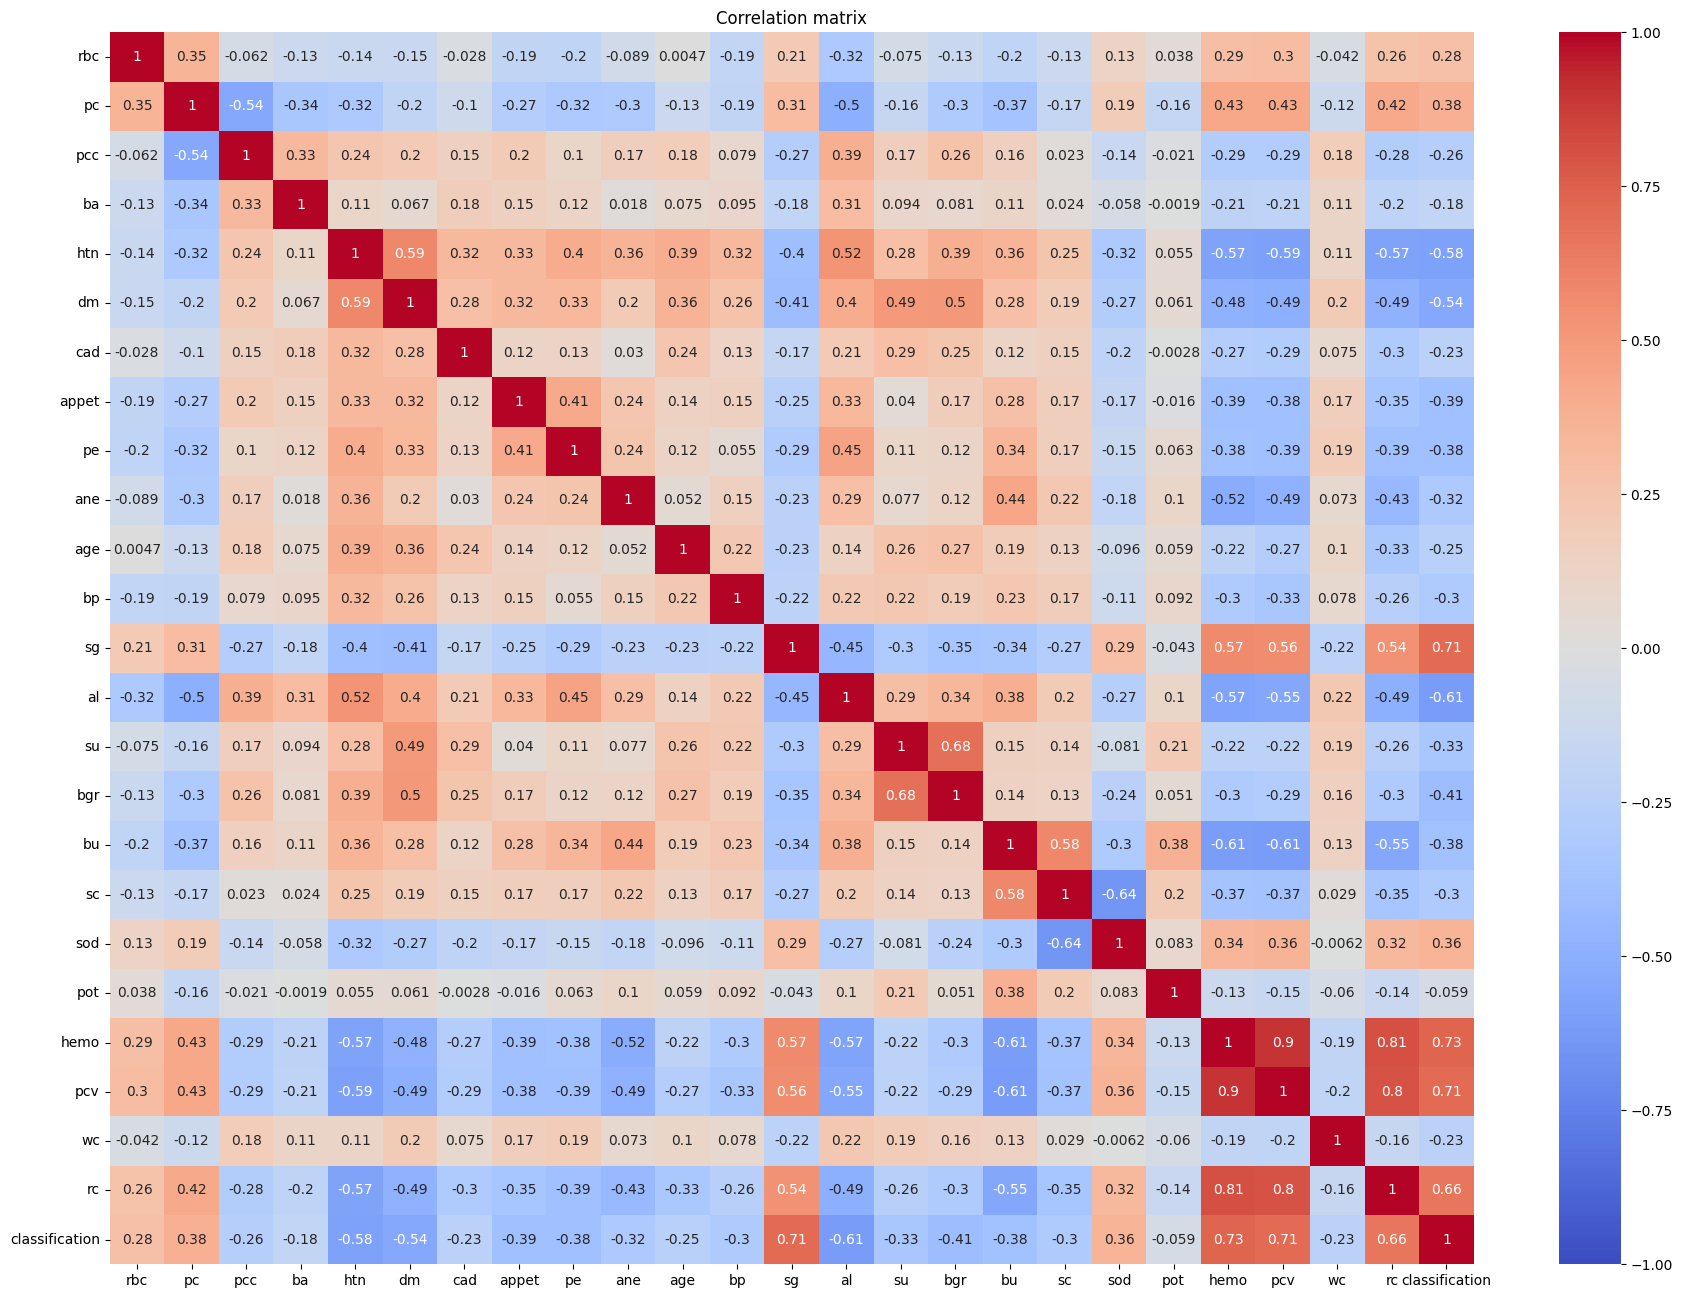

In [ ]:
preprocessed_train_df = pd.concat([X_train_transformed, y_train], axis=1)
corr_matrix = preprocessed_train_df.corr()

plt.figure(figsize=(22,16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.show()

# 4. Model training and evaluation

In [ ]:
SVM_RBF=SVC()
    
SVM_Poly2=SVC(kernel='poly',degree=2)
    
SVM_Poly3=SVC(kernel='poly',degree=3)

KNN3=KNeighborsClassifier(n_neighbors=3,weights='distance')

KNN8=KNeighborsClassifier(n_neighbors=8,weights='distance')

KNN15=KNeighborsClassifier(n_neighbors=15,weights='distance')

Naive_Bayes=GaussianNB()

LogReg=LogisticRegression()

Tree=DecisionTreeClassifier()

Forest=RandomForestClassifier()

models=[SVM_RBF,SVM_Poly2,SVM_Poly3,KNN3,KNN8,KNN15,Naive_Bayes,LogReg,Tree,Forest]

names = ["SVM RBF", "SVM Poly2", "SVM Poly3", 
         "KNN3", "KNN8", "KNN15", 
         "Naive Bayes", "Logistic Regression", "Decision Tree", "Random Forest"]

training_f1_scores = []
test_f1_scores = []

fig = go.Figure()

for i in range(len(models)):

    model = models[i]
    name = names[i]

    model.fit(X_train_transformed, y_train)
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)

    training_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    training_f1_scores.append(f1_score(y_train, y_train_pred))
    test_f1_scores.append(f1_score(y_test, y_test_pred))

fig = go.Figure(data=[
    go.Bar(name='Training', x=names, y=training_f1_scores),
    go.Bar(name='Test', x=names, y=test_f1_scores)
])

fig.update_layout(barmode='group', title="F1 Score Comparison: Training vs Test",
                  xaxis_title="Models", yaxis_title="F1 Score")
fig.show()